In [1]:
import pandas as pd
import numpy as np
from geopy.distance import great_circle
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist, squareform
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
mapa = pd.read_csv("mapa_mexico_w_lz_zonas_excluidas.csv")
solar = pd.read_csv("solar_generation_mexico.csv")
substations = pd.read_csv("subestaciones_w_lz.csv")

In [3]:
del mapa['X']
del mapa['Y']
del mapa['field_1']
del solar['Unnamed: 3']

The following scripts were used to pair the solar generation info. that we have with the locations were its possible to build new projects across the Mexican territory

1.


```py
import pandas as pd

mapa = pd.read_csv("mapa_mexico_w_lz_zonas_excluidas.csv")
solar = pd.read_csv("solar_generation_mexico.csv")

for i in range(len(solar)):
    print(float("{0:.6f}".format(round(solar['LAT'][i], 6))), end = " ")
    print(solar['GENERATION'][i])

print (" EEE ")

for i in range(len(mapa)):
    print(float("{0:.6f}".format(round(mapa['LAT'][i], 6))))
```

```
python <script>.py > S_GEN
```

2.

```cpp
#include <iostream>
#include <map>
using namespace std;

map<string, int> solar;
map<int, string> gen;

int main () {
  string s, z;
  int idx = 0;
  
  while (cin >> s >> z) {
    if (s == "EEE")
      break;
    
    solar[s] = idx++;
    gen[idx-1] = z;
  }

  while (cin >> s) {
    idx = solar[s];
    cout << gen[idx-1] << endl;
  }
  
  return 0;
}
```

```
./<script> < S_GEN > solar_gen.csv
```

In [34]:
temp = pd.read_csv("solar_gen.csv")
mapa['GEN'] = temp['GEN']

In [41]:
distance_to_nearest_lz_substation_km = []
ratio = []
substations = substations.sort_values(['lz'], ascending = True)

for i, row in mapa.iterrows():
    min_distance = 10000000000.0
    for _i, _row in (substations.loc[substations['lz'] == row['lz']]).iterrows():
        if great_circle((row['LAT'], row['LON']), (_row['Y'], _row['X'])).kilometers < min_distance:
            min_distance = great_circle((row['LAT'], row['LON']), (_row['Y'], _row['X'])).kilometers
    distance_to_nearest_lz_substation_km.append(min_distance)
    
mapa['NEAREST_SUBSTATION'] = distance_to_nearest_lz_substation_km

for i, row in mapa.iterrows():
    ratio.append(row['GEN']/row['NEAREST_SUBSTATION'])
mapa['RATIO'] = ratio

In [42]:
mapa.to_csv("mexico_w_lz_ratio_solar.csv")

## Representative distances

In [43]:
mexico = pd.read_csv("mexico_w_lz_ratio_solar.csv")
del mexico["Unnamed: 0"]
mexico = mexico.sort_values(['lz', 'RATIO'], ascending = [True, False])

In [44]:
mexico

,LAT,LON,lz,GEN,NEAREST_SUBSTATION,RATIO
17951,31.350316,-113.354598,1.0,3.558273e+06,0.447174,7.957248e+06
47891,28.204352,-111.027234,1.0,3.466976e+06,0.574257,6.037326e+06
81718,31.363192,-113.347662,1.0,3.558527e+06,1.155769,3.078926e+06
14334,28.666382,-111.798956,1.0,3.497589e+06,1.341591,2.607046e+06
22921,28.661072,-111.801576,1.0,3.497423e+06,1.438848,2.430710e+06
73784,29.121931,-110.535970,1.0,3.492985e+06,1.657842,2.106947e+06
63644,31.344701,-113.339633,1.0,3.558494e+06,1.729355,2.057701e+06
69012,31.015617,-110.679656,1.0,3.558284e+06,1.840325,1.933508e+06
47882,28.680554,-111.794602,1.0,3.498062e+06,2.047865,1.708150e+06
16168,29.237506,-111.694236,1.0,3.516854e+06,2.153821,1.632844e+06


In [45]:
plots = []
new_plot = []
c = -1

for i, row in mexico.iterrows():
    if (int(row['lz']) != c):
        if c != -1:
            plots.append(new_plot)
        new_plot = []
        c = int(row['lz'])
    new_plot.append(row['RATIO'])
    
# Add last loadzone.
plots.append(new_plot)

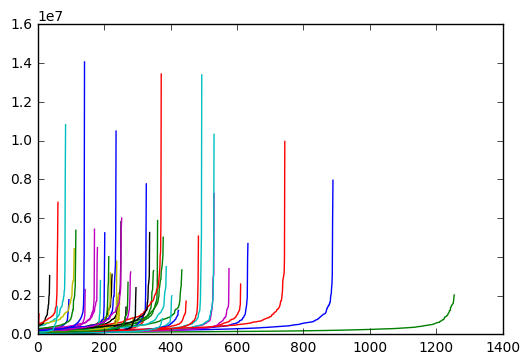

In [46]:
# Making a plot of the best 20% of each loadzone.

for p in plots:
    p = sorted(p)
    fp = int(len(p)*0.8)
    plt.plot(p[fp:])

In [47]:
media = []
media_idx = []
valores_alrededor = []

for p in plots:
    p = sorted(p)
    f = p[int(len(p)*0.8):]
    media.append(f[int(len(f)/2)])
    media_idx.append(int(len(f)/2))
    print (str(len(f)) + " / " + str(media_idx[-1]))
    valores_alrededor.append(f[int(len(f)/2 - len(f)*0.10):int(len(f)/2 + len(f)*0.10)])

890 / 445
350 / 175
612 / 306
495 / 247
532 / 266
239 / 119
252 / 126
634 / 317
1255 / 627
320 / 160
532 / 266
577 / 288
244 / 122
225 / 112
95 / 47
362 / 181
485 / 242
190 / 95
281 / 140
288 / 144
237 / 118
328 / 164
435 / 217
745 / 372
405 / 202
181 / 90
220 / 110
267 / 133
203 / 101
379 / 189
373 / 186
388 / 194
172 / 86
247 / 123
297 / 148
426 / 213
215 / 107
448 / 224
377 / 188
144 / 72
248 / 124
338 / 169
237 / 118
273 / 136
5 / 2
85 / 42
254 / 127
111 / 55
37 / 18
142 / 71
116 / 58
62 / 31
60 / 30


In [48]:
new_plants = []

for lz in range(1, 54):
    _df = mexico.loc[mexico['lz'] == lz]
    _df = _df.sort_values(by = ['RATIO'], ascending = [True])
    plant = []
    for i, row in _df.iterrows():
        if row['RATIO'] > valores_alrededor[lz-1][-1]:
            break
        if row['RATIO'] >= valores_alrededor[lz-1][0]:
            plant.append((row['LAT'], row['LON']))
    new_plants.append(plant)
new_plants

[[(31.304684309892238, -110.92214459280407),
  (28.905718292652921, -110.60802698286443),
  (28.758739169121252, -110.90571942443168),
  (31.260190277039108, -110.97571850852492),
  (30.561854611557511, -110.88094866303177),
  (30.705425892944231, -112.80549974389344),
  (28.79362849331077, -111.52108632017193),
  (31.326686324489536, -110.82637539239222),
  (29.345474956237048, -111.54449634530958),
  (31.016040042837663, -110.86751604850402),
  (31.363572736750307, -113.53107441115331),
  (29.058680805375708, -110.37511531711012),
  (28.897414045654674, -110.9006516760596),
  (29.136982008337153, -111.10529966906604),
  (28.709150258272729, -110.68692130401686),
  (30.787105246093716, -112.8526298385094),
  (28.795886856775926, -111.7230129861092),
  (30.33320810934611, -111.05213321226739),
  (30.663224552781447, -112.67794916910481),
  (30.724103858761072, -112.55886594673842),
  (30.53970575674068, -111.00166838060026),
  (31.130661254261391, -110.60083817094795),
  (30.8011366150

In [49]:
representative_distances = []

for m in media:
    x = mexico.loc[mexico['RATIO'] == m]
    representative_distances.append(x.values[0][4])

In [50]:
for i in range(0, 53):
    print ("Loadzone " + str(i+1) + ": " + str(representative_distances[i]) + "km.")

Loadzone 1: 15.105447894km.
Loadzone 2: 11.2079455931km.
Loadzone 3: 16.7717905993km.
Loadzone 4: 16.9546571823km.
Loadzone 5: 19.6496413101km.
Loadzone 6: 35.5356282809km.
Loadzone 7: 10.785881107km.
Loadzone 8: 17.3816833526km.
Loadzone 9: 20.9686553446km.
Loadzone 10: 20.5529220834km.
Loadzone 11: 23.5208092769km.
Loadzone 12: 20.4532849151km.
Loadzone 13: 16.1884838843km.
Loadzone 14: 8.91154533935km.
Loadzone 15: 10.1177857933km.
Loadzone 16: 9.91560837587km.
Loadzone 17: 17.7890337939km.
Loadzone 18: 32.3542941578km.
Loadzone 19: 14.8182896261km.
Loadzone 20: 22.6886631992km.
Loadzone 21: 43.4003458209km.
Loadzone 22: 23.4296044965km.
Loadzone 23: 9.45786390346km.
Loadzone 24: 11.1237714127km.
Loadzone 25: 26.0277642894km.
Loadzone 26: 7.88301052618km.
Loadzone 27: 12.5280724128km.
Loadzone 28: 44.4847477174km.
Loadzone 29: 18.8987334293km.
Loadzone 30: 7.72393214433km.
Loadzone 31: 6.6379992289km.
Loadzone 32: 10.9200003225km.
Loadzone 33: 8.32710460025km.
Loadzone 34: 17.612545

## Clustering "new plants" for every loadzone.
We use DBSCAN to generate clusters from the proposed locations of new plants.
For DBSCAN, we take $\epsilon = d$, being $d$ the representative distance of each loadzone. 

### Example with a single loadzone.

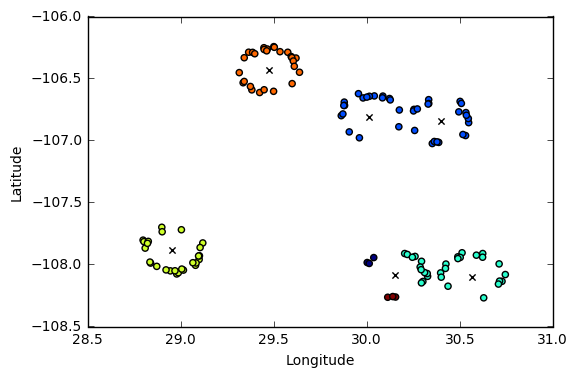

In [129]:
_lz = 7
distance_matrix = squareform(pdist(new_plants[_lz], (lambda u, v: great_circle(u, v).kilometers)))
db = DBSCAN(eps = representative_distances[_lz], min_samples = 1, metric = 'precomputed')
y_db = db.fit_predict(distance_matrix)
cluster = y_db

X = [a for (a,b) in new_plants[_lz]]
Y = [b for (a,b) in new_plants[_lz]]

plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.scatter(X, Y, c = cluster)

# We can see how this clusters actually exist near or around existing substations.

_X = [row['X'] for i, row in (substations.loc[substations['lz'] == _lz + 1]).iterrows()]
_Y = [row['Y'] for i, row in (substations.loc[substations['lz'] == _lz + 1]).iterrows()]

plt.scatter(_Y, _X, c = 'black', marker='x')
plt.show()

### Obtaining all clusters.

In [130]:
centroids = []

for _lz in range(0, 53):
    distance_matrix = squareform(pdist(new_plants[_lz], (lambda u, v: great_circle(u, v).kilometers)))
    db = DBSCAN(eps = representative_distances[_lz], min_samples = 1, metric = 'precomputed')
    y_db = db.fit_predict(distance_matrix)
    cluster = y_db

    np_clusters_centroids = []
    
    for x in range(max(cluster) + 1):
        np_clusters_centroids.append([])

    i = 0
    for c in cluster:
        np_clusters_centroids[c].append((new_plants[_lz][i]))
        i = i + 1

    # A cluster will be taken into account to generate a representative profile (using its centroid),
    # iff the number of points in the clusters adds up to, at least, 10% of the total
    # of points in the loadzone.
    
    add_to_centroids = []
    for c in np_clusters_centroids:
        if (len(c) >= len(cluster) * 0.1):
            add_to_centroids.append((sum(pair[0] for pair in c)/len(c),sum(pair[1] for pair in c)/len(c)))
    
    centroids.append(add_to_centroids)
    
i = 1
for c in centroids:
    for _c in c:
        print(str(_c[0]) + ", " + str(_c[1]) + ", " + str(i))
    i = i + 1

31.1077463728, -110.86974465, 1
29.0884099865, -110.772085416, 1
30.7825073445, -112.687691897, 1
29.7730092619, -109.068731888, 2
30.4724353666, -110.149810645, 2
29.9221279159, -109.335538255, 2
30.6396970686, -109.815162564, 2
27.3000246394, -109.437432932, 3
28.7262461824, -110.346512506, 3
28.2012785787, -108.887463595, 3
25.8696655424, -108.562957125, 4
25.298465453, -107.944405607, 4
24.4651666502, -107.010314691, 5
25.1285102262, -107.395756956, 5
23.1415387689, -105.830767042, 6
31.6101710615, -106.447988738, 7
31.327933017, -107.047757811, 7
31.5985977888, -107.274716753, 7
30.2164345642, -106.782565889, 8
30.450289769, -108.030771897, 8
28.9601337133, -107.928010207, 8
29.4743893495, -106.390573112, 8
28.3144656315, -104.82076171, 9
27.4804127453, -105.26697047, 9
27.9825630051, -103.893419797, 9
28.642633908, -106.342295943, 9
23.9328787396, -104.707495928, 10
25.530569788, -103.59339531, 11
28.9395316098, -101.080567378, 12
27.7463821021, -101.903287756, 12
27.7114246743, 